# Цель исследования

Изучить датасет, выявить интересные закономерности на рынке недвижимости Санкт-Петербурга и соседних населенных пунктов.

**Ход исследования:**
  - Первичное ознакомление с данными 
  - Обработка данных:
     - исключение/обработка дубликатов и пропусков
     - корректировка типов данных
     - отсечение выбивающихся значений 
  - Изучение столбцов для выявления интересных фактов и закономерностей
  - Вывод

# Знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
display (data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,NaN,...,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приведем наименование 16 столбца к единому формату:

In [3]:
data = data.rename(columns={'cityCenters_nearest':'citycenters_nearest'})

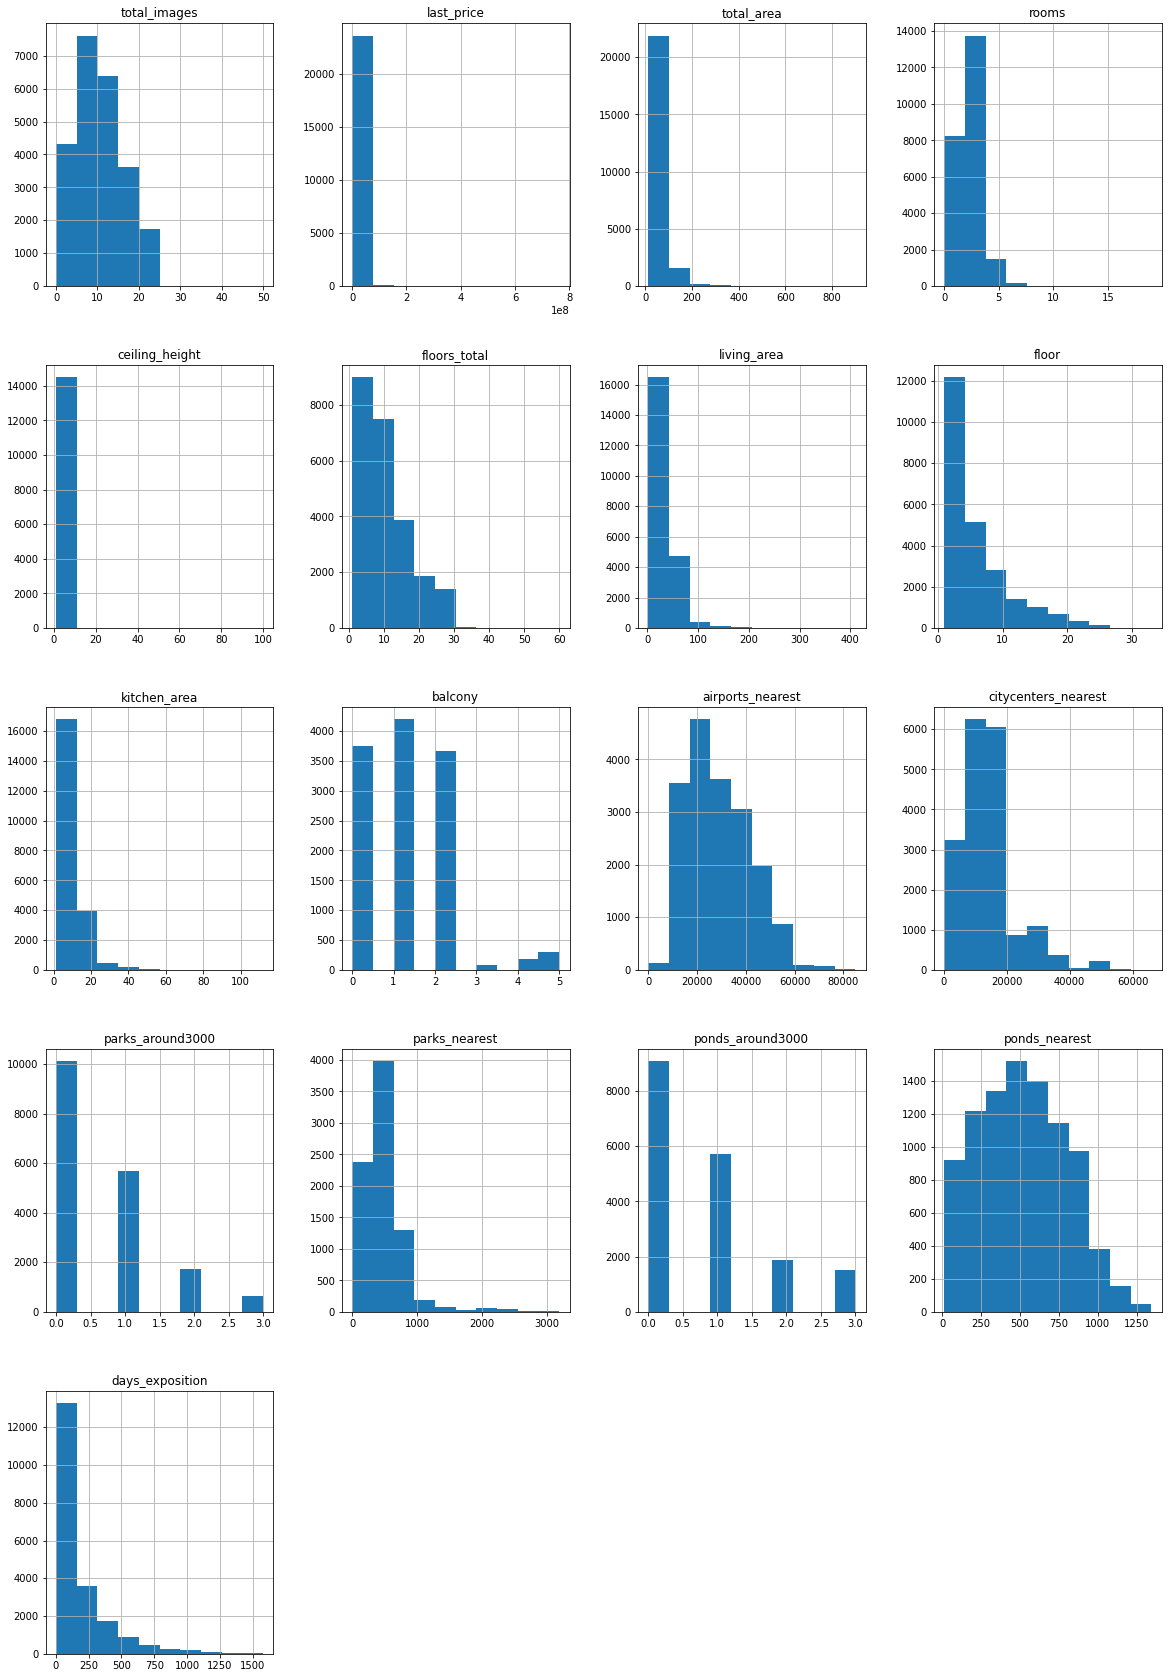

In [4]:
data.hist(figsize=(20, 30))
plt.show()

# Предобработка данных

## Обработка дубликатов

In [5]:
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**Явных дубликатов не обнаружено.**

Проверим неявные дубликаты в столбце locality_name:


In [6]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Кажется, типов поселков слишком много. Приведем их к единому знаменателю:

In [7]:
data['locality_name'] = data['locality_name'].replace('поселок','посёлок', regex=True)
data['locality_name'] = data['locality_name'].replace('городской ','', regex=True)
data['locality_name'] = data['locality_name'].replace('коттеджный ','', regex=True)
data['locality_name'] = data['locality_name'].replace('городского типа ','', regex=True)
data['locality_name'] = data['locality_name'].replace('станции ','', regex=True)
data['locality_name'] = data['locality_name'].replace('при железнодорожной ','', regex=True)
data['locality_name'] = data['locality_name'].replace('имени ','', regex=True)
data['locality_name'] = data['locality_name'].replace('некоммерческое ','', regex=True)

In [8]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Такие неявные дубликаты могли быть вызваны двумя причинами: если наименование заполняли люди - человеческий фактор. Хотя более вероятно, что названия можно было выбрать "из списка". Тогда, скорее всего, тип поселка менялся со временем.

## Обработка пропусков и выбивающихся значений

График столбца last_price подозрительно начинается совсем близко к нулю. Изучим его подробнее:

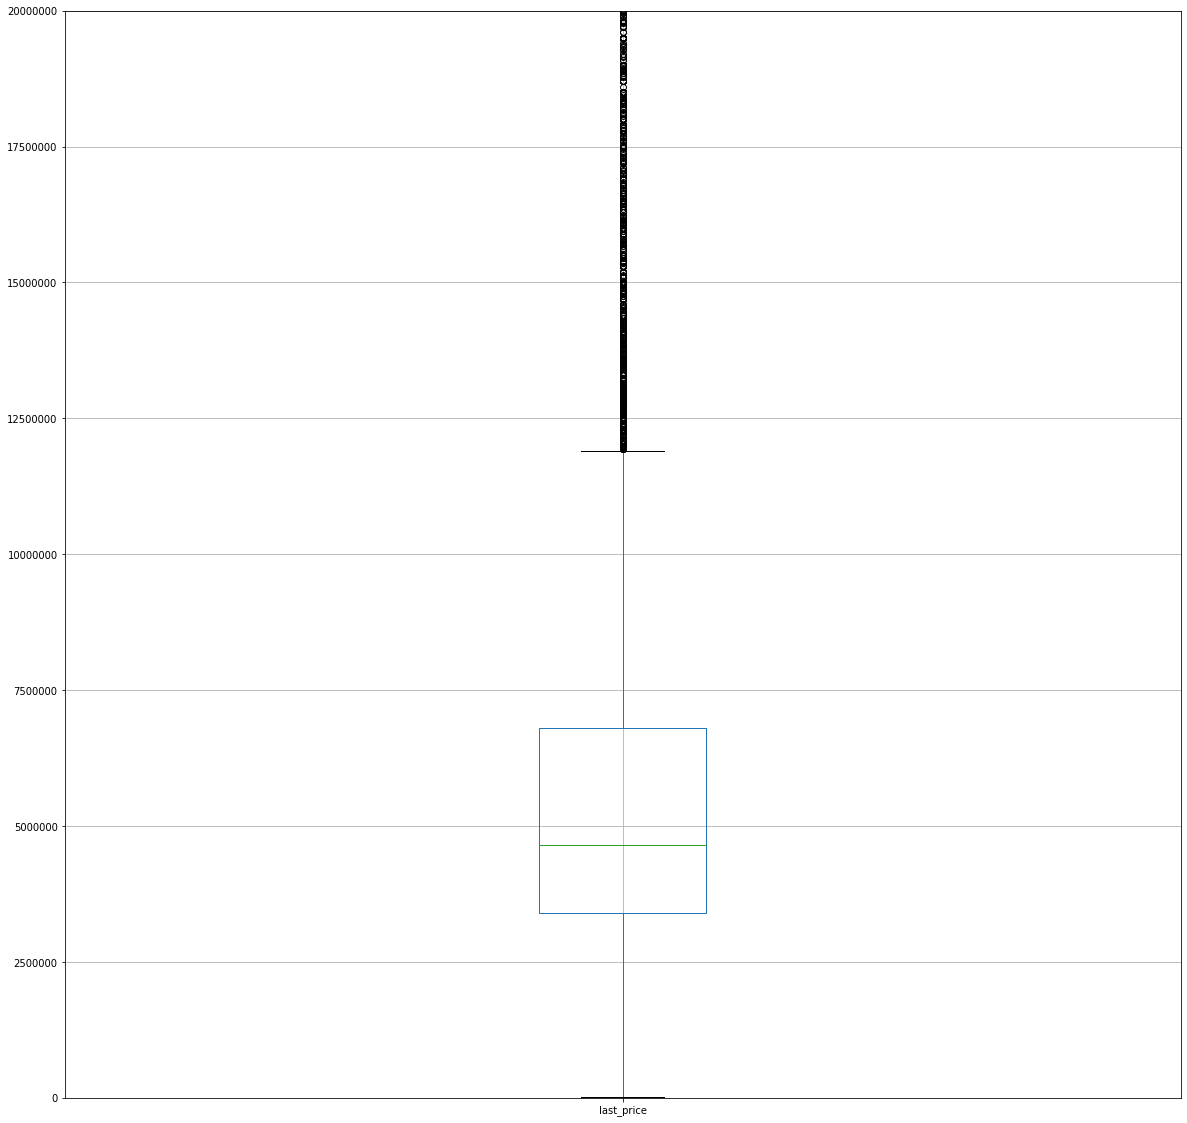

In [9]:
data.boxplot(column='last_price', figsize=(20, 20))
plt.gca().ticklabel_format(axis="y", style='plain')
plt.ylim(0, 20000000)
plt.show()

Мы видим, что правый "ус" простирается непрерывно до 100 000 000. Отбросим редкие значения за пределами (очевидно ошибочные цены):

In [10]:
data = data.query('100000000> last_price > 100000')

По основной информации о датасете мы видим, что есть пропуски в нескольких столбцах. 

Первый на очереди - ceiling_height. Пропуски в нем могут быть связаны как с техническим аспектом - ошибки в выгрузке/эти данные не собирались, так и, наиболее вероятно, с человческим фактором - мало кто знает, какая в его квартире высота потолков, поэтому этот пункт просто пропускали. 

In [11]:
data[data['ceiling_height'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,NaN,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,NaN,27.000,15.430,26,NaN,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
11,9,3300000.000,44.000,2018-08-27T00:00:00,2,NaN,5.000,31.000,4,False,...,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
12,10,3890000.000,54.000,2016-06-30T00:00:00,2,NaN,5.000,30.000,5,NaN,...,9.000,0.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000
14,1,4400000.000,36.000,2016-06-23T00:00:00,1,NaN,6.000,17.000,1,NaN,...,8.000,0.000,Пушкин,20782.000,30759.000,0.000,NaN,1.000,96.000,203.000


Так, наиболее логично будет заменить пропуски в этом столбце медианным значением, так как закономерности между пропусками в ceiling_height и данными в других столбцах не проглядываются.

Для прочей точности, добавим зависимость медианного значения от населенного пункта:

In [12]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name),'ceiling_height'] = median
    
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

Так же, на ознакомительной гистограмме этого столбца мы видим странные значения. Изучим его распределение подробнее:

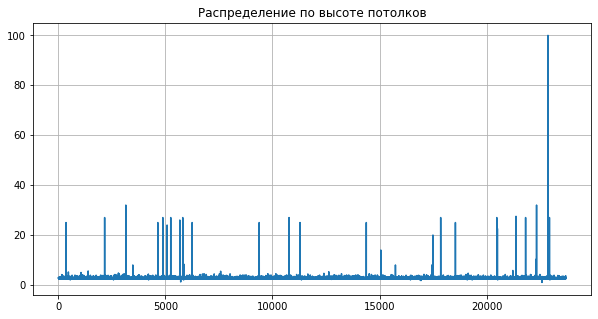

In [13]:
data['ceiling_height'].plot(grid=True, figsize=(10, 5))
plt.title('Распределение по высоте потолков')
plt.show()

Выбивающихся значений много. Возможно, дело в том, что это особая недвижимость. Но тогда и цена у нее должна быть особая. Построим график корреляции между высотой потолков и ценой,а так же вычислим коэффициент Пирсона:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


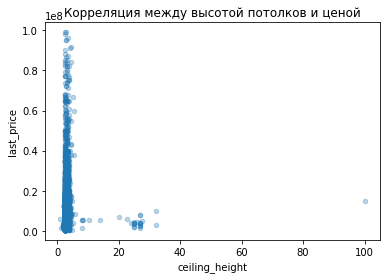

0.0887146780896928


In [14]:
data.plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.3) 
plt.title('Корреляция между высотой потолков и ценой')
plt.show()
print(data['ceiling_height'].corr(data['last_price']))

Как мы видим, корреляции почти нет. Судя по графику, значения больше 5 метров можно назвать выбросом. Но сперва узначени, какие потолки вообще бывают:

In [15]:
data['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.65 ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.6  ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,
         2.8  ,   3.   ,   3.2  ,   2.61 ,   2.51 ,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.78 ,   2.65 ,   2.76 ,
        25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,   2.59 ,
         2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,   3.13 ,
         3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,   2.53 ,
         2.74 ,   2.96 ,   2.46 ,   5.   ,   2.79 ,   2.95 ,   4.06 ,
         2.94 ,   3.54 ,   3.53 ,   2.83 ,   2.4  ,   3.38 ,   3.01 ,
         5.6  ,   3.65 ,   3.18 ,   3.35 ,   2.3  ,   2.525,   3.57 ,
         2.48 ,   2.62 ,   2.82 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,
         3.95 ,   3.75 ,   2.88 ,   3.67 ,   3.87 ,   3.66 ,   3.86 ,
         4.19 ,   3.

Судя по значениям, некоторые просто не там поставили точку, либо же программа при переносе не верно ее считала. Исправим это:

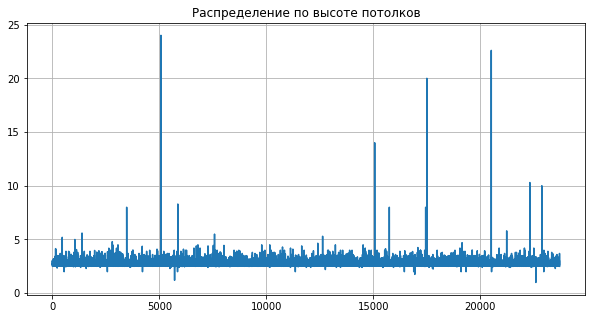

In [16]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x:x*0.1 if x>=25 else x)

data['ceiling_height'].plot(grid=True, figsize=(10, 5))
plt.title('Распределение по высоте потолков')
plt.show()

Таким образом, мы устранили наибольшее количество выбросов среди потолков. И нам не остается ничего больше, кроме как отбросить остальные. Здравый смысл подсказывает, что потолки меньше 2 и больше 10 метров - не нормально.

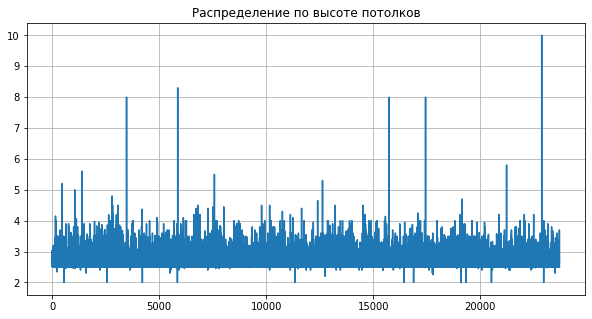

In [17]:
data = data.query('2 <= ceiling_height <= 10')

data['ceiling_height'].plot(grid=True, figsize=(10, 5))
plt.title('Распределение по высоте потолков')
plt.show()

Следущий в очереди на проверку пропусков у нас столбец floors_total

In [18]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.000,65.200,2018-10-02T00:00:00,2,2.700,NaN,30.800,4,NaN,...,12.000,NaN,Санкт-Петербург,39197.000,12373.000,1.000,123.000,0.000,NaN,49.000
237,4,2438033.000,28.100,2016-11-23T00:00:00,1,2.700,NaN,20.750,1,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,251.000
457,4,9788348.000,70.800,2015-08-01T00:00:00,2,2.700,NaN,38.400,12,NaN,...,10.630,0.000,Санкт-Петербург,37364.000,8322.000,2.000,309.000,2.000,706.000,727.000
671,4,6051191.000,93.600,2017-04-06T00:00:00,3,2.700,NaN,47.100,8,NaN,...,16.800,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,123.000
1757,5,3600000.000,39.000,2017-04-22T00:00:00,1,2.700,NaN,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,77.000
1930,1,9750000.000,66.770,2016-05-13T00:00:00,2,2.700,NaN,NaN,4,NaN,...,NaN,0.000,Санкт-Петербург,39886.000,10660.000,1.000,2276.000,3.000,244.000,90.000
2392,7,5395770.000,53.000,2017-06-29T00:00:00,2,2.700,NaN,29.000,22,NaN,...,9.000,0.000,Санкт-Петербург,43074.000,10820.000,0.000,NaN,0.000,NaN,48.000
2846,4,2325000.000,27.800,2016-09-21T00:00:00,1,2.700,NaN,19.400,15,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,307.000
2952,10,6500000.000,54.300,2019-04-23T00:00:00,1,2.700,NaN,22.200,6,NaN,...,12.300,NaN,Санкт-Петербург,23606.000,3148.000,0.000,NaN,0.000,NaN,NaN
3031,9,6400000.000,56.700,2018-03-27T00:00:00,2,2.730,NaN,32.000,12,NaN,...,12.000,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.000


Пропуски в этом столбце могут быть вызваны теми же проблемами, что и в предыдущем. Но в отличии от него, мы не сможем заполнить пропуски средним/медианным значением, ведь подставить "этажность" дома по стандарту может быть черевато - может получится, что квартира находится на последнем этаже, когда это не так, или же наоборот. С этим параметром будет связано наше исследледование в будущем, поэтому не стоит рисковать.

Следующий столбец с пропусками - living_area:

In [19]:
data[data['living_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.700,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.700,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.560,9.000,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,NaN,1,NaN,...,NaN,NaN,посёлок Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,2.700,22.000,NaN,3,NaN,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
59,15,6300000.000,46.500,2017-03-06T00:00:00,1,2.700,13.000,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.000,14501.000,0.000,NaN,0.000,NaN,336.000
60,3,2740000.000,35.000,2018-01-01T00:00:00,1,2.700,12.000,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.000
81,9,10949000.000,68.000,2018-12-27T00:00:00,1,2.700,10.000,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.000,80.500,2018-01-15T00:00:00,3,2.630,25.000,NaN,16,NaN,...,NaN,NaN,посёлок Шушары,12430.000,18217.000,0.000,NaN,0.000,NaN,60.000
116,18,10999000.000,97.200,2017-11-13T00:00:00,3,2.500,16.000,NaN,16,NaN,...,18.300,5.000,Санкт-Петербург,19426.000,21138.000,0.000,NaN,2.000,390.000,394.000


В этом столбце мы видим выбивающиеся значения. ЖК РФ устанавливает и минимальную норму жилой площади - 6 кв. м на одного человека. А значит все значения жилой площади меньше 6 можно исключить.

In [20]:
data = data.query('6 < living_area')

Стоит ли заполнять эти пропуски - спорный вопрос. Ведь неверное заполненение в данном случае так же исказит данные. Но есть один параметр от котого, в теории, на прямую зависит площадь - количество комнат. Проверим корреляцию между значениями, чтобы проверить эту теорию.

In [21]:
data['living_area'].corr(data['rooms'])

0.8519978060758537

Корреляция достаточно хорошо прослеживается, а значит мы можем заменить пропущенные значения в living_area на медианные значения в зависимости от количества комнат:

In [22]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))

<ipython-input-22-996a0fc644a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))


Следующий столбец с пропусками - is_apartment. Значения в этом столбце может быть только два - да (True) и нет (False). Но пропусков очень много. 

In [23]:
data['is_apartment'].value_counts()

False    2609
True       41
Name: is_apartment, dtype: int64

Моя теория их возникновения такова: апартаменты распространены значительно меньше квартир, поэтому, предположительно, большая часть пропусков в этом столбце соответсвует значению False. Однако, заменять все пропущенные значения на отрицательные рискованно - их слишком много. В любом случае, проанализировать данные по такому малому количеству информации не получится.

Следущий столбец - kitchen_area. Пропуски в нем могли появится по тем же причинам, что и в 'ceiling_height' - вероятно, имеет место быть технический аспект, но, скорее всего это человеческий фактор в виде невозможности измерить метраж кухни. 

In [24]:
data[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.000,27.000,2017-03-30T00:00:00,0,2.700,24.000,15.500,2,NaN,...,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000
155,8,96000000.000,317.000,2017-07-07T00:00:00,4,3.500,3.000,183.000,3,NaN,...,NaN,1.000,Санкт-Петербург,22673.000,1771.000,2.000,508.000,3.000,366.000,62.000
178,18,16300000.000,153.000,2019-03-30T00:00:00,4,2.710,10.000,89.400,10,NaN,...,NaN,1.000,Санкт-Петербург,52130.000,14042.000,0.000,NaN,2.000,346.000,NaN
188,15,4600000.000,38.500,2019-04-16T00:00:00,1,2.500,12.000,18.500,5,NaN,...,NaN,NaN,Санкт-Петербург,49065.000,16735.000,1.000,501.000,0.000,NaN,NaN
199,4,3735325.000,37.400,2019-03-22T00:00:00,1,2.730,12.000,17.000,4,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,21.000
237,4,2438033.000,28.100,2016-11-23T00:00:00,1,2.700,NaN,20.750,1,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,251.000
248,7,4100000.000,31.000,2015-08-02T00:00:00,1,3.000,17.000,10.000,6,False,...,NaN,0.000,Санкт-Петербург,39771.000,8672.000,1.000,139.000,0.000,NaN,637.000
280,15,4900000.000,63.000,2017-04-26T00:00:00,2,2.700,9.000,34.400,5,NaN,...,NaN,0.000,Санкт-Петербург,40880.000,16747.000,0.000,NaN,0.000,NaN,22.000
349,4,2320000.000,25.000,2017-09-27T00:00:00,0,2.750,14.000,17.000,1,NaN,...,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
355,17,3600000.000,55.200,2018-07-12T00:00:00,2,2.500,5.000,32.000,2,False,...,NaN,2.000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.000


В этом столбце так же выбивающиеся минимальные значения. Согласно закону и здравому смыслу, допускается проектировать кухни или кухни-ниши площадью не менее 5 кв.метров. Исключим их:

In [25]:
data = data.query('6 < kitchen_area')

Можно предположить, что площадь кухни коррелирует с общей жилой площадью. Проверим это:

In [26]:
data['kitchen_area'].corr(data['living_area'])

0.39687362890753836

Как мы видим, корреляция слишком маленькая, чтобы говорить о взаимосвязи наверняка. Значит оставляем этот пункт с пропусками. Уж если от жилой площади прощадь кухни не зависит, то медианой ее не познать.

Обратимся к наличию балконов:

In [27]:
data['balcony'].value_counts()

2.000    3228
1.000    3135
0.000    2831
5.000     268
4.000     164
3.000      70
Name: balcony, dtype: int64

В данном случае можно предположить, что если значение пропущенно, значит балкона в квартире нет. Посему - множим нули:

In [28]:
data['balcony'] = data['balcony'].fillna(0)

<ipython-input-28-9374f0e6c999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].fillna(0)


Балконы (их отсутсвие), успешно размножены.


Следующие предстают нашему вниманию столбцы, дающие представления об инфтраструктуре объекта недвижимости. Они, как мы знаем, получены автоматически на основе картографических данных. Пропуски в этих столбцах вызваны либо ошибкой выгрузки, либо ошибкой программы при заполнении столбцов. Возможно, программа не вписывала расстояние до центра, аэропорта и т.д., если расстояние превышало определенный лимит. Тогда пропуск можно воспринимать как "отсутвие поблизости".

Таким образом, заполнить пропуски в airports_nearest, parks_nearest и ponds_nearest мы не можем. 
Но можем в parks_around3000 и ponds_around3000. Тут мы видим, что пропуск значения обозначает отсутсвие. Так же заполним часть пропусков в citycenters_nearest средним значением по населенному пункту.

In [29]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<ipython-input-29-f0faaa96b025>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parks_around3000'] = data['parks_around3000'].fillna(0)
<ipython-input-29-f0faaa96b025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


In [30]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'citycenters_nearest'].median()
    data.loc[(data['citycenters_nearest'].isna()) & (data['locality_name'] == locality_name),'citycenters_nearest'] = median

/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

##Изменение типов данных

Преобразуем получившиеся данные для удобства дальнейшей работы. В last_price мы видим вещественный тип, тогда как сами значения целочисленные. Аналогичная ситуация со слолбцами balcony, parks_around3000, ponds_around3000.
Похожая ситуация с floors_total, airports_nearest, citycenters_nearest, parks_nearest, ponds_nearest, days_exposition, однако в них есть пропущенные значения, что затрудняет перевод.

In [31]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

Так же переведем first_day_exposition в формат datetime, удобный для последующей работы со столбцом:

In [32]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17977 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17977 non-null  int64         
 1   last_price            17977 non-null  int64         
 2   total_area            17977 non-null  float64       
 3   first_day_exposition  17977 non-null  datetime64[ns]
 4   rooms                 17977 non-null  int64         
 5   ceiling_height        17977 non-null  float64       
 6   floors_total          17939 non-null  float64       
 7   living_area           17977 non-null  float64       
 8   floor                 17977 non-null  int64         
 9   is_apartment          2221 non-null   object        
 10  studio                17977 non-null  bool          
 11  open_plan             17977 non-null  bool          
 12  kitchen_area          17977 non-null  float64       
 13  balcony         

## Добавление столбцов

Добавим в датасет столбцы, которые пригодятся для дальнейшей работы:

In [33]:
data['meter_price'] = (data['last_price']/data['total_area']).round() #цена квадратного метра
data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday #день недели публикации
data['month_publication'] = data['first_day_exposition'].dt.month #месяц публикации
data['year_publication'] = data['first_day_exposition'].dt.year #год публикации

def floor_name(data):
    if data.floor == 1:
        return 'первый'
    elif data.floor == data.floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_name'] = data.apply(floor_name, axis=1) #тип этажа квартиры
data['citycenters_nearest_km'] = (data['citycenters_nearest']/1000).round() #расстояние до центра города в километрах

display (data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_of_publication,month_publication,year_publication,floor_name,citycenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16.000,51.000,8,NaN,...,482.000,2,755.000,NaN,120370.000,3,3,2019,другой,16.000
1,7,3350000,40.400,2018-12-04,1,2.630,11.000,18.600,1,NaN,...,NaN,0,NaN,81.000,82921.000,1,12,2018,первый,19.000
2,10,5196000,56.000,2015-08-20,2,2.700,5.000,34.300,4,NaN,...,90.000,2,574.000,558.000,92786.000,3,8,2015,другой,14.000
4,2,10000000,100.000,2018-06-19,2,3.030,14.000,32.000,13,NaN,...,112.000,1,48.000,121.000,100000.000,1,6,2018,другой,8.000
5,10,2890000,30.400,2018-09-10,1,2.650,12.000,14.400,5,NaN,...,NaN,0,NaN,55.000,95066.000,0,9,2018,другой,NaN
6,6,3700000,37.300,2017-11-02,1,2.640,26.000,10.600,6,NaN,...,NaN,0,NaN,155.000,99196.000,3,11,2017,другой,19.000
8,20,2900000,33.160,2018-05-23,1,2.700,27.000,15.430,26,NaN,...,NaN,0,NaN,189.000,87455.000,2,5,2018,другой,NaN
9,18,5400000,61.000,2017-02-26,3,2.500,9.000,43.600,7,NaN,...,NaN,0,NaN,289.000,88525.000,6,2,2017,другой,15.000
10,5,5050000,39.600,2017-11-16,1,2.670,12.000,20.300,3,NaN,...,310.000,2,553.000,137.000,127525.000,3,11,2017,другой,14.000
12,10,3890000,54.000,2016-06-30,2,2.600,5.000,30.000,5,NaN,...,NaN,0,NaN,90.000,72037.000,3,6,2016,последний,NaN


**Вывод**

В этой части исследования провели предобработку датафрейма, а именно:
  - проверка датафрема на дубликаты, работа с неявными дубликатами в названиях населенных пунктов
  - исключение выбивающихся значений *(цена, высота потолков, площадь кухни)*
  - замена пропусков *(высота потолков, наличие балконов, расстояние до центра)*
  - корректировка типов данных *(дата выставления объявления, цена, балконы и тд.)* для облегчения дальнейшей работы
  - добавление столбцов, необходимых для дальнейшей работы: цена за метр, день, месяц и год публикации в отдельности.
  
Ошибки/пропуски в данных могли быть вызваны как техническими ошибками (при переносе данных в датафрейм, например), так и человеским фактором (банальная ошибка в заполнении).

# Исследовательский анализ данных 

## Общая площадь

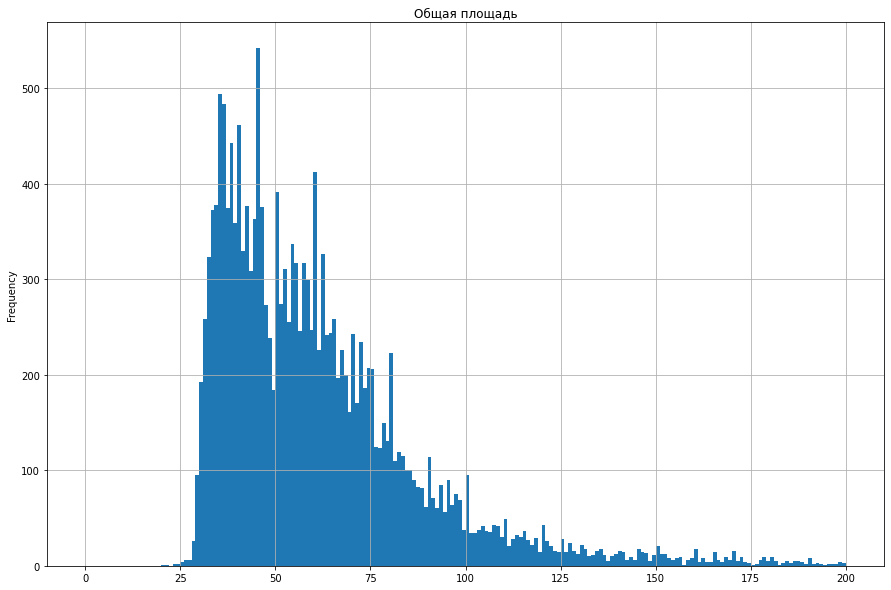

count   17977.000
mean       63.015
std        34.161
min        20.670
25%        41.300
50%        55.000
75%        73.000
max       590.000
Name: total_area, dtype: float64


In [34]:
data['total_area'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 200, range=(0,200))
plt.title('Общая площадь')
plt.show()
print(data['total_area'].describe())

По гистограмме мы видим нормальное распределение, однако значения свыше 200 кв.метров можно считать редкими. 

Так же мы видим, что площадь большей части объектов - до 75 кв.метров, а самый распространенный метраж - примерно 45 кв.метров.

## Жилая площадь

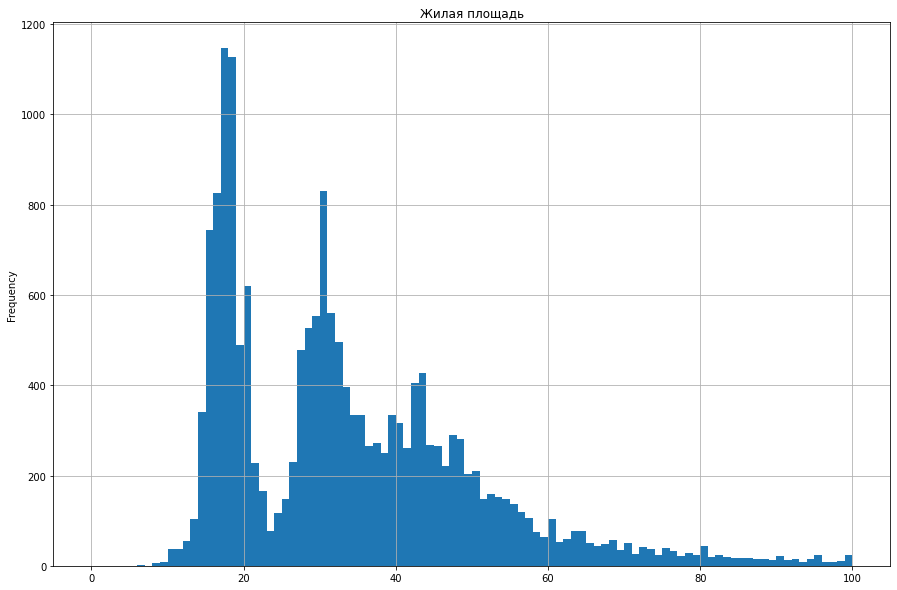

count   17977.000
mean       35.507
std        22.286
min         6.500
25%        19.000
50%        31.000
75%        43.700
max       409.000
Name: living_area, dtype: float64


In [35]:
data['living_area'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 100, range=(0,100))
plt.title('Жилая площадь')
plt.show()
print(data['living_area'].describe())

На этом графике "нормальная" площадь стала еще меньше - жилая площадь свыше 100 кв.м. - редкость.  Так же мы видим "провал" в графике примерно на 20 кв.метрах. 
Самая модная жилая площадь - примерно 17-18 кв.метров.

## Площадь кухни

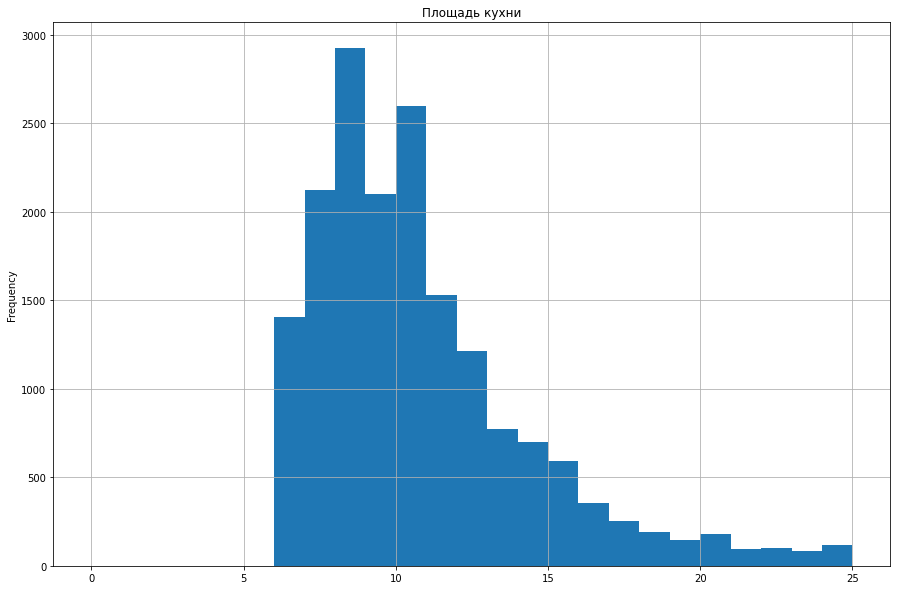

count   17977.000
mean       11.281
std         5.754
min         6.020
25%         8.000
50%        10.000
75%        12.300
max       107.000
Name: kitchen_area, dtype: float64


In [36]:
data['kitchen_area'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 25, range = (0,25))
plt.title('Площадь кухни')
plt.show()
print(data['kitchen_area'].describe())

Более 4 тысяч кухонь - меньше 10 кв.метров. А вот кухонь больше 20 кв.метров - совсем мало. 
Самый модный метраж кухни - 8 кв.метров.

## Цена объекта 

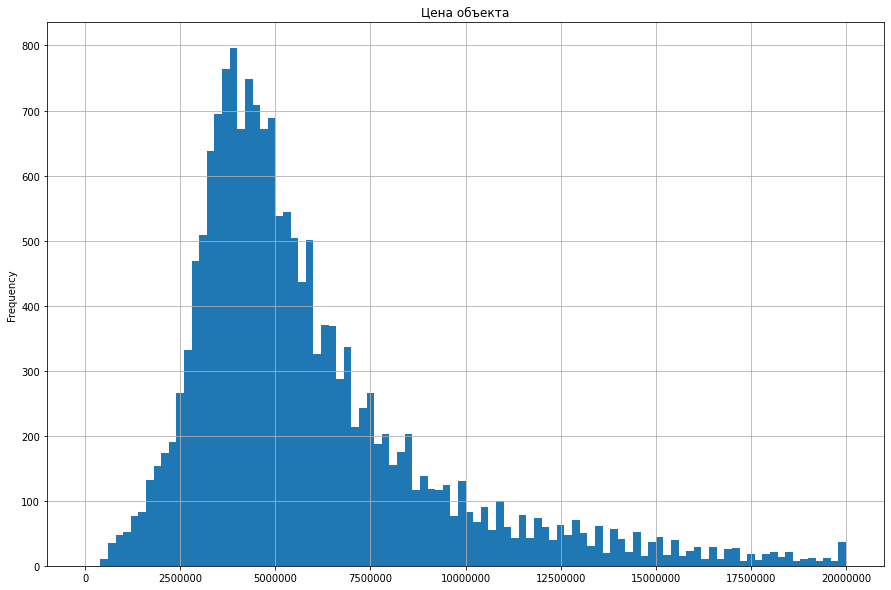

count      17977.000
mean     6745653.561
std      6623668.650
min       450000.000
25%      3750000.000
50%      5000000.000
75%      7300000.000
max     99000000.000
Name: last_price, dtype: float64


In [37]:
data['last_price'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 100, range = (0,20000000))
plt.title('Цена объекта')
plt.gca().ticklabel_format(axis="x", style='plain')
plt.show()
print(data['last_price'].describe())

Всплеск на этой гистограмме мы видим от 2,5 до 5 млн. После 5 млн количество объектов идет на спад. Все логично в рамках исследования рынка - наибольшая часть объектов находится в одной ценовой категории. Объектов дороже намного меньше.

## Количество комнат

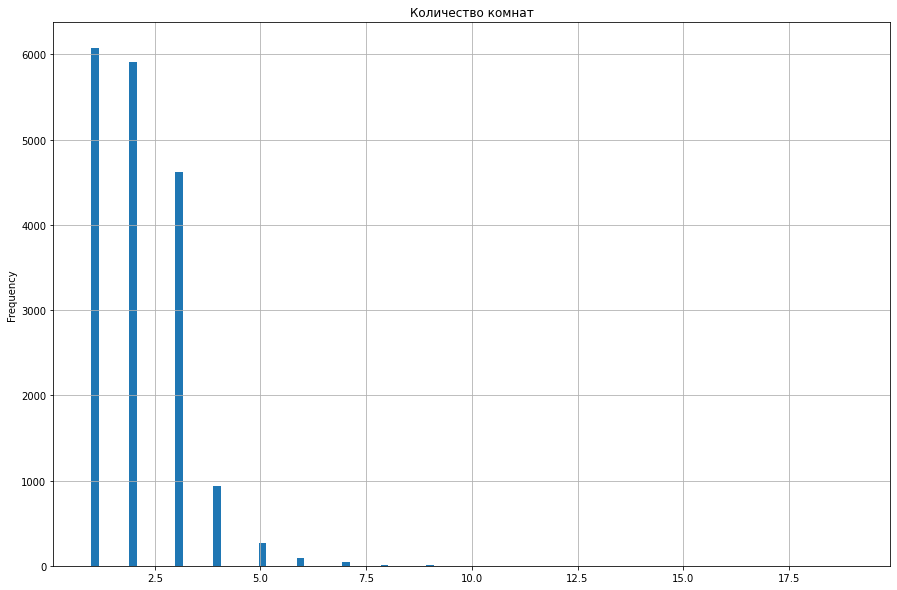

count   17977.000
mean        2.113
std         1.085
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64


In [38]:
data['rooms'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 100)
plt.title('Количество комнат')
plt.show()
print(data['rooms'].describe())

Больше всего "однушек" (более 6000) и "двушек" (почти 6000). "Трешки" не дотягивают и до 5000.

## Высота потолков

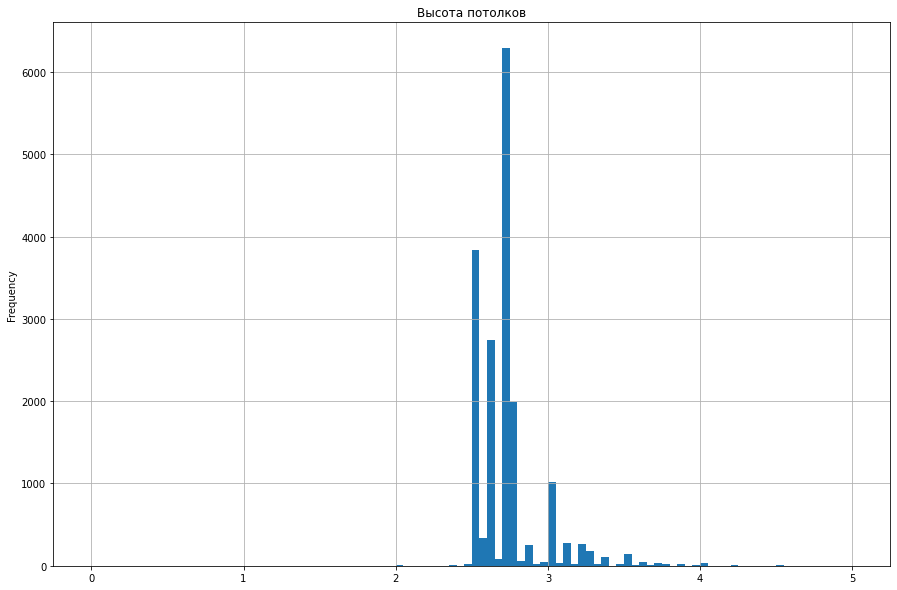

count   17977.000
mean        2.722
std         0.244
min         2.000
25%         2.600
50%         2.700
75%         2.750
max        10.000
Name: ceiling_height, dtype: float64


In [39]:
data['ceiling_height'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 100, range = (0,5))
plt.title('Высота потолков')
plt.show()
print(data['ceiling_height'].describe())

Самая распространенная высота потолков - примерно 2,7 метра.


## Этаж квартиры

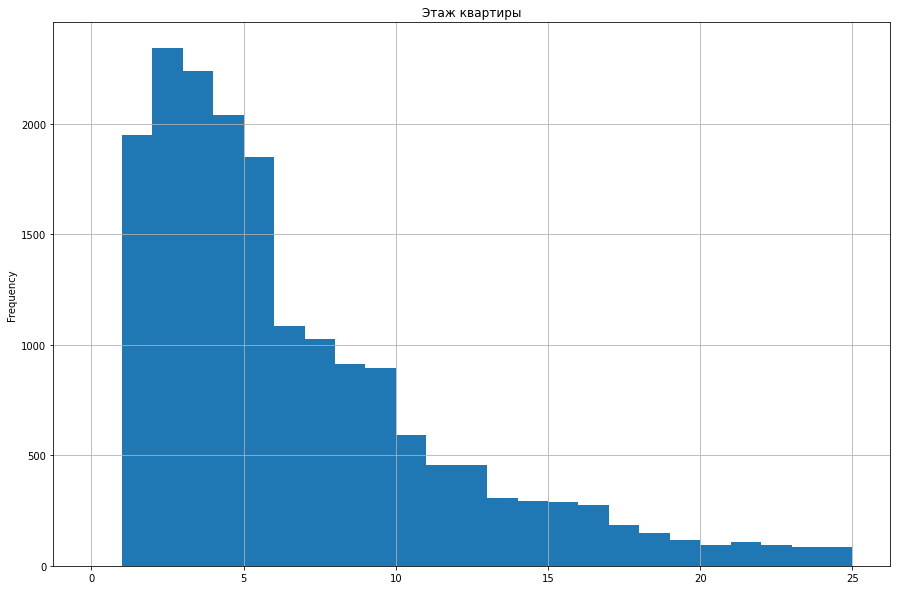

count   17977.000
mean        6.258
std         5.009
min         1.000
25%         3.000
50%         5.000
75%         9.000
max        33.000
Name: floor, dtype: float64


In [40]:
data['floor'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 25, range = (0,25))
plt.title('Этаж квартиры')
plt.show()
print(data['floor'].describe())

Недвижимости, находящейся от 1 до 5 этажа значительно больше недвижимости, находященйся от 5 до 10, а тем более от 10 до 15.. Скорее всего это связано с распространенностью пятиэтажек.


## Тип этажа квартиры

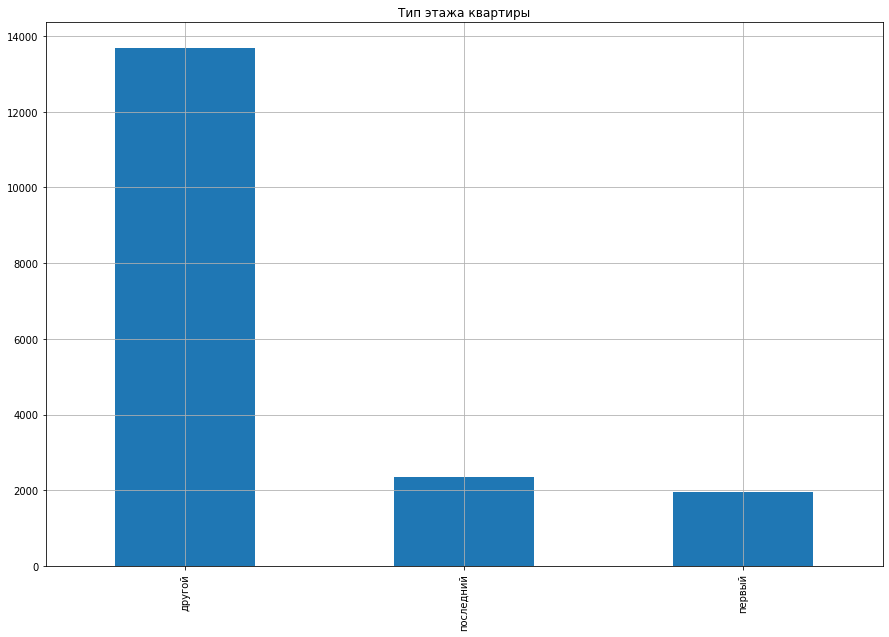

count      17977
unique         3
top       другой
freq       13679
Name: floor_name, dtype: object


In [41]:
data['floor_name'].value_counts().plot(kind='bar', grid=True, figsize=(15, 10))
plt.title('Тип этажа квартиры')
plt.show()
print(data['floor_name'].describe())

Квартир на последнем и на первом этаже примерно одно количество (в районе 2000 в каждой категории). Остальные находятся на промежуточных этажах.


##  Общее количество этажей в доме

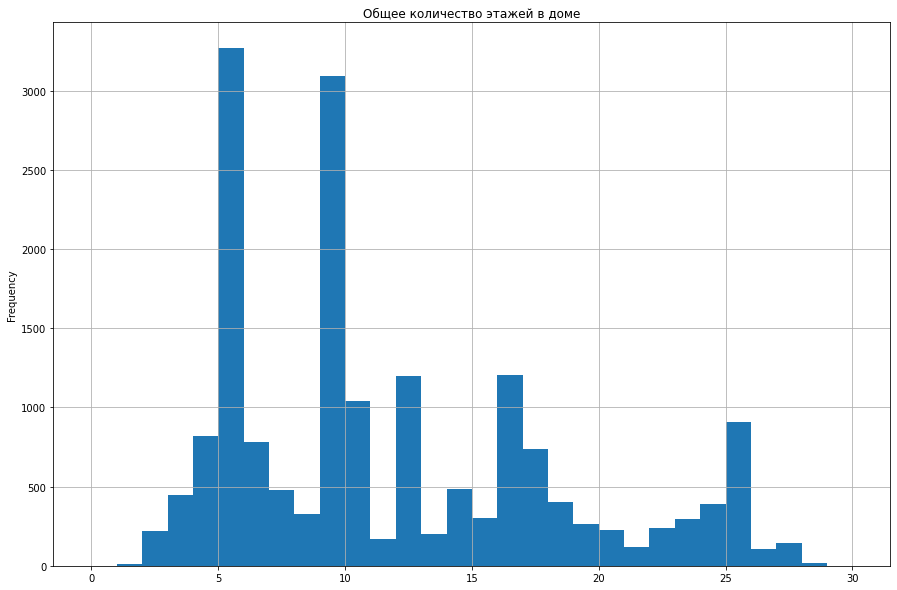

count   17939.000
mean       11.374
std         6.606
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64


In [42]:
data['floors_total'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 30, range = (0,30))
plt.title('Общее количество этажей в доме')
plt.show()
print(data['floors_total'].describe())

Этот график подтверждает предположение о распространенности пятиэтажек. Так же мы видим большой всплеск на девятиэтажках.


## Расстояние до центра города в метрах

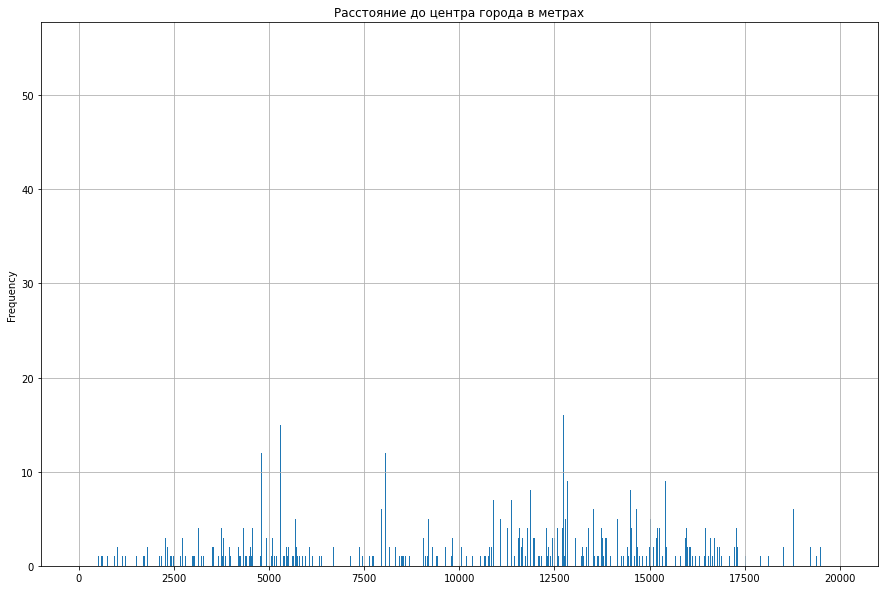

count   14345.000
mean    13809.756
std      8154.359
min       181.000
25%      8955.000
50%     13064.000
75%     16094.000
max     65952.000
Name: citycenters_nearest, dtype: float64


In [43]:
data['citycenters_nearest'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 20000, range = (0,20000))
plt.title('Расстояние до центра города в метрах')
plt.show()
print(data['citycenters_nearest'].describe())

У большинства объектов до центра города до 20 км.
На графике мы видим 4 выраженных пика, а это значит, что чаще всего расстояние до центра от объекта составляет 4,8 км, 5,2 км, 8 км, 12,7 км. Можно предположить, что в этой удаленности нахдятся крупные жилые комплексы.


## Расстояние до ближайшего аэропорта

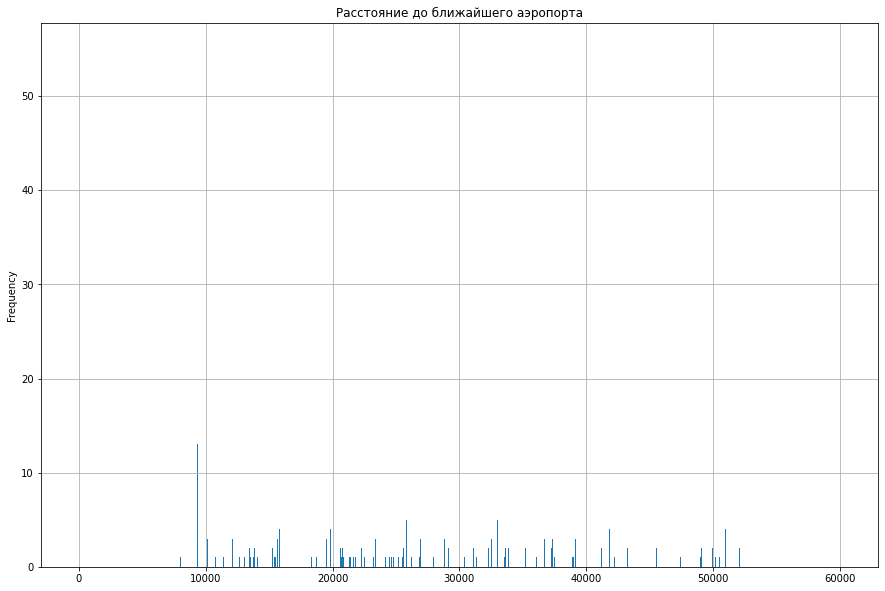

count   14280.000
mean    29034.879
std     12412.215
min      6450.000
25%     18971.000
50%     27046.000
75%     37091.000
max     84853.000
Name: airports_nearest, dtype: float64


In [44]:
data['airports_nearest'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 60000, range = (0,60000))
plt.title('Расстояние до ближайшего аэропорта')
plt.show()
print(data['airports_nearest'].describe())

Обычно аэропорт дальше 10 км и ближе 38 км. Самолеты точно мешать не будут.


##  Расстояние до ближайшего парка

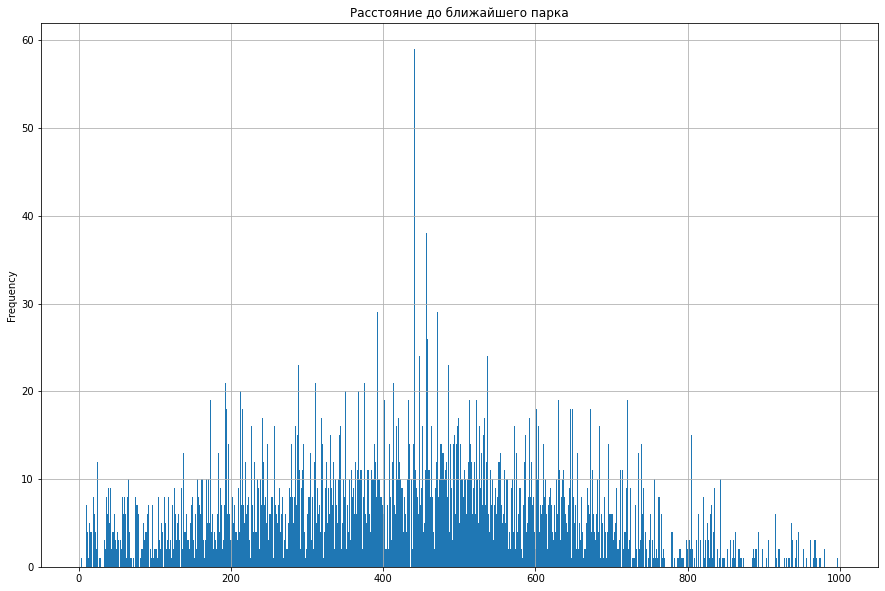

count   6311.000
mean     489.799
std      340.730
min        1.000
25%      287.000
50%      455.000
75%      613.000
max     3064.000
Name: parks_nearest, dtype: float64


In [45]:
data['parks_nearest'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 1000, range = (0,1000))
plt.title('Расстояние до ближайшего парка')
plt.show()
print (data['parks_nearest'].describe())

Чаще всего парк находится +- в полукилометре от объекта


## День публикации объявления

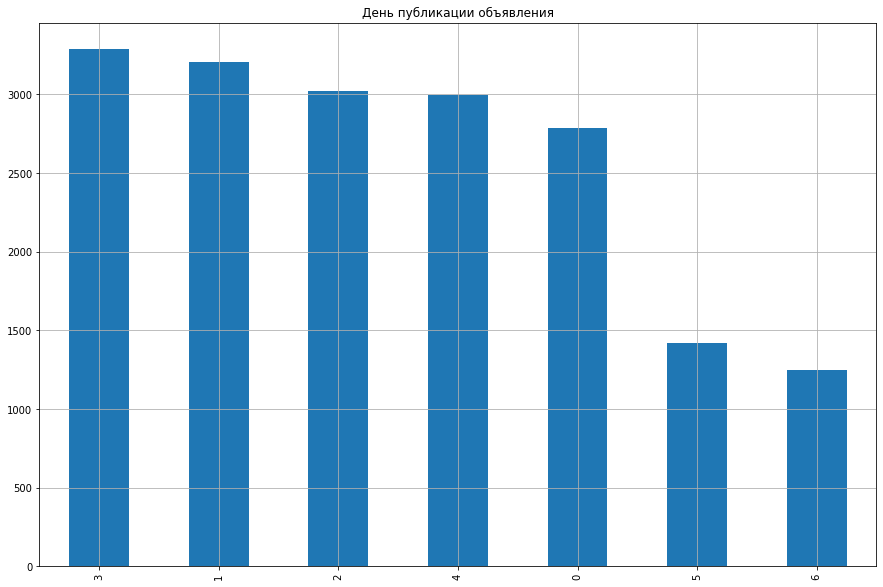

count   17977.000
mean        2.543
std         1.783
min         0.000
25%         1.000
50%         2.000
75%         4.000
max         6.000
Name: weekday_of_publication, dtype: float64


In [46]:
data['weekday_of_publication'].value_counts().plot(kind='bar', grid=True, figsize=(15, 10))
plt.title('День публикации объявления')
plt.show()
print(data['weekday_of_publication'].describe())

Объявления чаще всего публикуют в среду и реже всего в воскресенье.


## Месяц публикации объявления

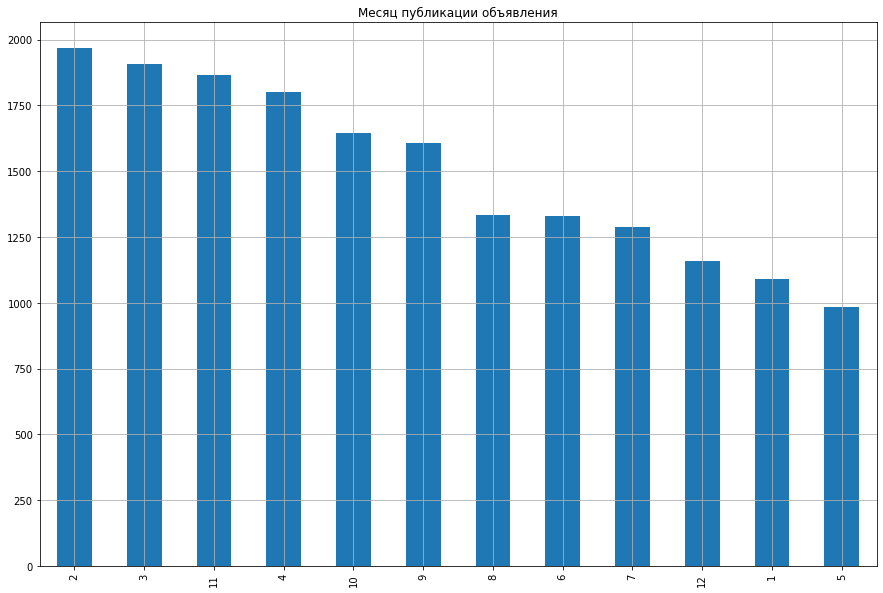

count   17977.000
mean        6.446
std         3.469
min         1.000
25%         3.000
50%         6.000
75%        10.000
max        12.000
Name: month_publication, dtype: float64


In [47]:
data['month_publication'].value_counts().plot(kind='bar', grid=True, figsize=(15, 10))
plt.title('Месяц публикации объявления')
plt.show()
print(data['month_publication'].describe())

Больше всего объявлений было опублиоквано в феврале. Меньше всего - в мае.

## Скорость продажи квартир

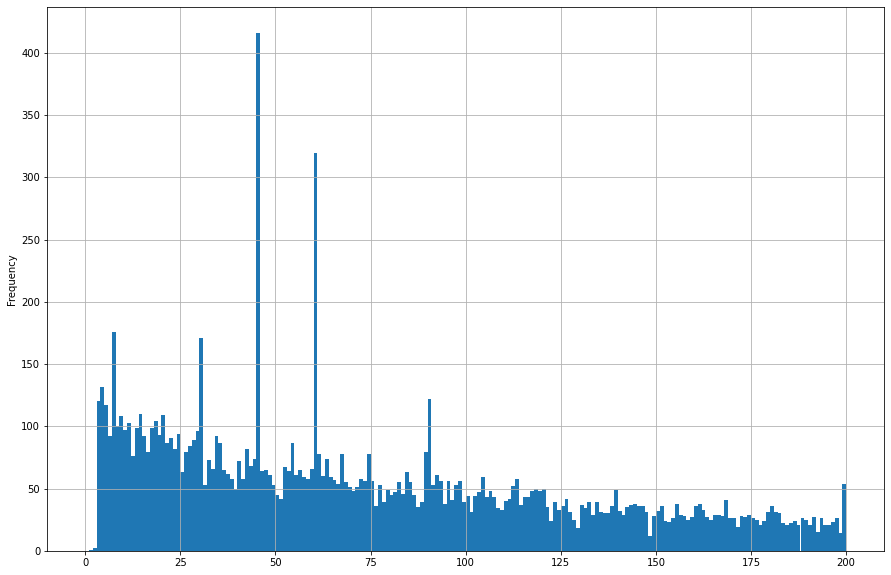

Среднее арифметическое:  188.486608583414
Медиана:  104.0
count   15495.000
mean      188.487
std       224.860
min         1.000
25%        45.000
50%       104.000
75%       245.000
max      1580.000
Name: days_exposition, dtype: float64


In [48]:
data['days_exposition'].plot(kind='hist', grid=True, figsize=(15, 10), bins = 200, range = (0,200))
plt.show()
print('Среднее арифметическое: ',data['days_exposition'].mean())
print('Медиана: ',data['days_exposition'].median())
print(data['days_exposition'].describe())

Согласно полученным данным, можем сделать следующие выводы:
   - в среднем, продажа объекта занимает 95 дней
   - гистограмма показывает нам всплеск на примерно 50 днях - почти 3000 объектов были проданы в этот промежуток
   - объекты, которые не продаются дольше 600 дней - можно считать "долгими", а те что продались в первые 10 дней - "быстрыми"
   - на графике мы так же видим интересные выбивающиеся значения: 45 и 60. Возможно, дело в магии чисел. Но, скорее всего, в подписке или контракте

## Влияние факторов на общую стоимость объекта

### Общая площадь

Корреляция 0.8180611845993115


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


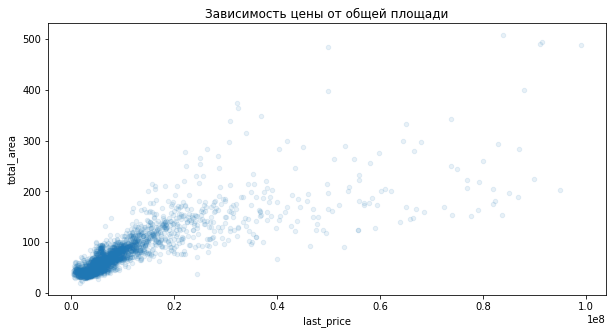

In [49]:
pivot_total_area = data.pivot_table(index='last_price', values='total_area').reset_index()
pivot_total_area.plot(
    x='last_price', y='total_area', 
    kind='scatter', alpha=0.1, figsize=(10, 5),  
    title='Зависимость цены от общей площади') 
print('Корреляция', pivot_total_area['last_price'].corr(pivot_total_area['total_area']))

Корреляция показывает, что взаимосвязь есть - коэфицент положительный и достаточно высокий.


### Жилая площадь

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция 0.7558994901586082


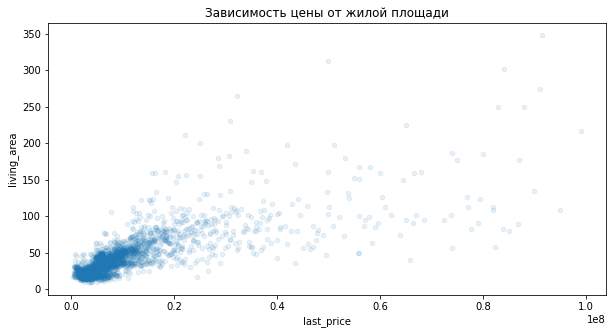

In [50]:
pivot_living_area = data.pivot_table(index='last_price', values='living_area').reset_index()
pivot_living_area.plot(
    x='last_price', y='living_area', 
    kind='scatter', alpha=0.1, figsize=(10, 5),
    title='Зависимость цены от жилой площади') 
print('Корреляция', pivot_living_area['last_price'].corr(pivot_living_area['living_area']))

Корреляция показывает, что взаимосвязь средне-высокая так же есть - коэфицент положительный.


### Площадь кухни

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция 0.6352823197410785


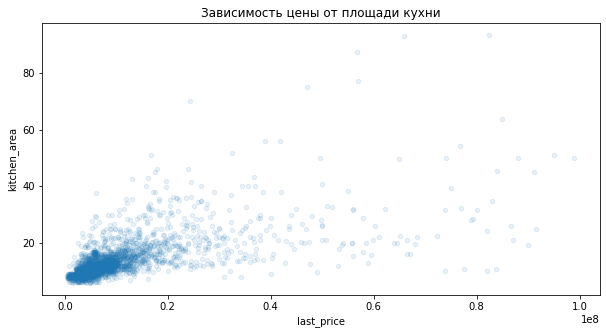

In [51]:
pivot_kitchen_area = data.pivot_table(index='last_price', values='kitchen_area').reset_index()
pivot_kitchen_area.plot(
    x='last_price', y='kitchen_area', 
    kind='scatter', alpha=0.1, figsize=(10, 5),
    title='Зависимость цены от площади кухни') 
print('Корреляция', pivot_kitchen_area['last_price'].corr(pivot_kitchen_area['kitchen_area']))

От площади кухни цена зависит еще меньше, чем от жилой площади, однако - зависит. Коэфицент положительный, взаимосвзяь средняя.

### Количество комнат 

Корреляция 0.7204154039706681


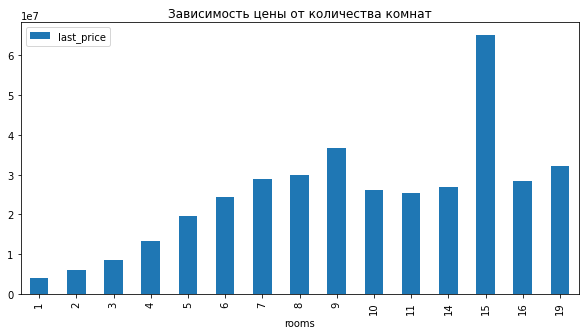

In [52]:
pivot_rooms = data.pivot_table(index='rooms', values='last_price').reset_index()
pivot_rooms.plot(
    x='rooms', y='last_price',
    kind='bar', figsize=(10, 5),
    title='Зависимость цены от количества комнат') 
print('Корреляция', pivot_rooms['last_price'].corr(pivot_rooms['rooms']))

Коэфицент положительный, взаимосвязь средне-высокая.


### Этаж

Корреляция 0.0005574848259843932


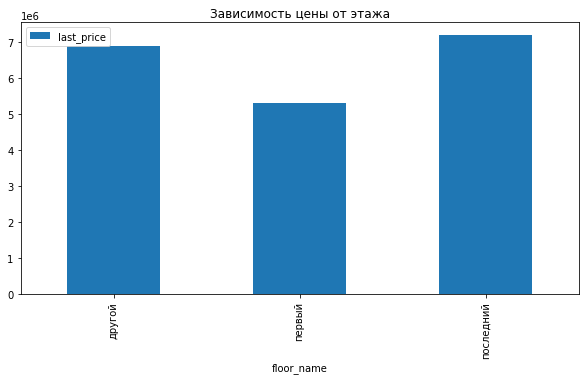

In [53]:
pivot_floor = data.pivot_table(index='floor_name', values='last_price').reset_index()
pivot_floor.plot(
    x='floor_name', y='last_price',
    kind='bar', figsize=(10, 5),
    title='Зависимость цены от этажа') 
print('Корреляция', data['last_price'].corr(data['floor']))#строим по основному датафрейму, 
                                                           #так как не можем вычистиль корреляцию по категориям 

И график, и корреляция показывают, что взимосвязи между этажем и ценой почти нет. Единственное что мы видим - первый этаж "проседает" в цене по сравнению с другими.


### День публикации

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция -0.2930538027179285


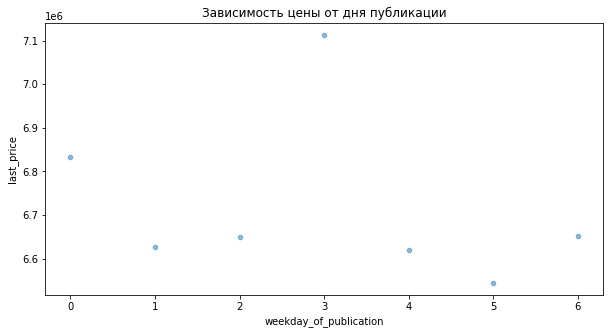

In [54]:
pivot_weekday_of_publication = data.pivot_table(index='weekday_of_publication', values='last_price').reset_index()
pivot_weekday_of_publication.plot(
    x='weekday_of_publication', y='last_price', 
    kind='scatter', alpha=0.5, figsize=(10, 5), 
    title='Зависимость цены от дня публикации') 
print('Корреляция', pivot_weekday_of_publication['last_price'].corr(pivot_weekday_of_publication['weekday_of_publication']))

И на графике, и по корреляции мы видим, что линейной взаимосвязи между ценой и днем публикации почти нет.


### Месяц публикации 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция 0.1368687919195087


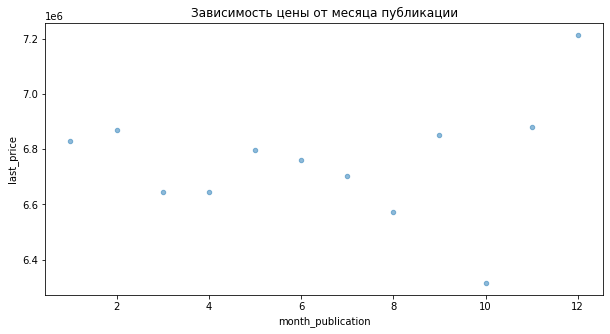

In [55]:
pivot_month_publication = data.pivot_table(index='month_publication', values='last_price').reset_index()
pivot_month_publication.plot(
    x='month_publication', y='last_price', 
    kind='scatter', alpha=0.5, figsize=(10, 5),
    title='Зависимость цены от месяца публикации') 
print('Корреляция', pivot_month_publication['last_price'].corr(pivot_month_publication['month_publication']))

От месяца публикации цена тоже не особо зависит.


### Год публикации

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция -0.7640381629728307


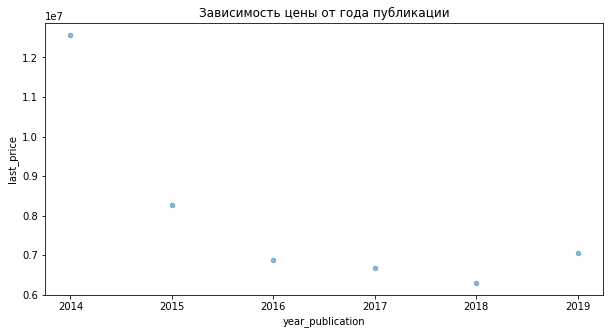

In [56]:
pivot_year_publication = data.pivot_table(index='year_publication', values='last_price').reset_index()
pivot_year_publication.plot(
    x='year_publication', y='last_price', 
    kind='scatter', alpha=0.5, figsize=(10, 5),
    title='Зависимость цены от года публикации') 
print('Корреляция', pivot_year_publication['last_price'].corr(pivot_year_publication['year_publication']))

Коэфицент корреляции и график в этом случае показывают линейную обратную взаимосвязь. Это может говорить о том, что с период с 2014 по 2018 год включительно цена на недвижимость становилась меньше, а в 2019 снова показала рост. Но это может быть связано так же с изменениями непостраедственно продаваемой недвижимости. Больше всего с ценой, как мы выяснили ранее, связана площадь. Проверим, как менялась площадь в зависимости от года публикации:


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция -0.8773070663308734


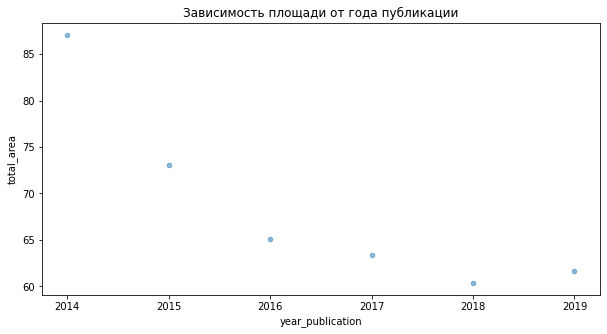

In [57]:
pivot_year_publication_and_total_area = data.pivot_table(index='year_publication', values='total_area').reset_index()
pivot_year_publication_and_total_area.plot(
    x='year_publication', y='total_area', 
    kind='scatter', alpha=0.5, figsize=(10, 5),
    title='Зависимость площади от года публикации') 
print('Корреляция', pivot_year_publication_and_total_area['total_area'].corr(pivot_year_publication_and_total_area['year_publication']))

Мы видим достаточно прямую обратную корреляцию между годом публикации и площадью. Таким образом, можем сделать вывод, что цена на недвижимость снижалась с 2014 по 2018 за счет снижения площади продаваемых объектов. Это могло быть вызвано как повышением спроса на объекты с меньшим метражем, так и экономическими факторами рынка. Было быц интересно, как повела себя эта тенденция, дойдя до наших дней.


**Вывод**

Итак, мы выяснили, что сильнее всего цена объекта связана с общей и жилой площадью, а так же, соответсвенно, с количеством комнат. Так же мы видим обратную линейную взаимосвязь между ценой и годом публикации за счет снижения метража продаваемой недвижимсоти.


## Средняя цена одного кв.метра в 10 населённых пунктах с наибольшим числом объявлений

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:


In [58]:
(data['locality_name'].value_counts()).head(10) #список 10 населённых пунктах с наибольшим числом объявлений

Санкт-Петербург      12540
посёлок Мурино         421
посёлок Шушары         374
Всеволожск             329
посёлок Парголово      280
Колпино                251
Пушкин                 241
деревня Кудрово        225
Гатчина                183
Кудрово                149
Name: locality_name, dtype: int64

,locality_name,ads,medium_meter_price
0,Санкт-Петербург,12540,105806.000
1,Пушкин,241,102373.000
2,Кудрово,149,99707.000
3,посёлок Парголово,280,92295.000
4,деревня Кудрово,225,91570.000
5,посёлок Мурино,421,84286.000
6,посёлок Шушары,374,77356.000
7,Колпино,251,75000.000
8,Гатчина,183,69608.000
9,Всеволожск,329,66173.000


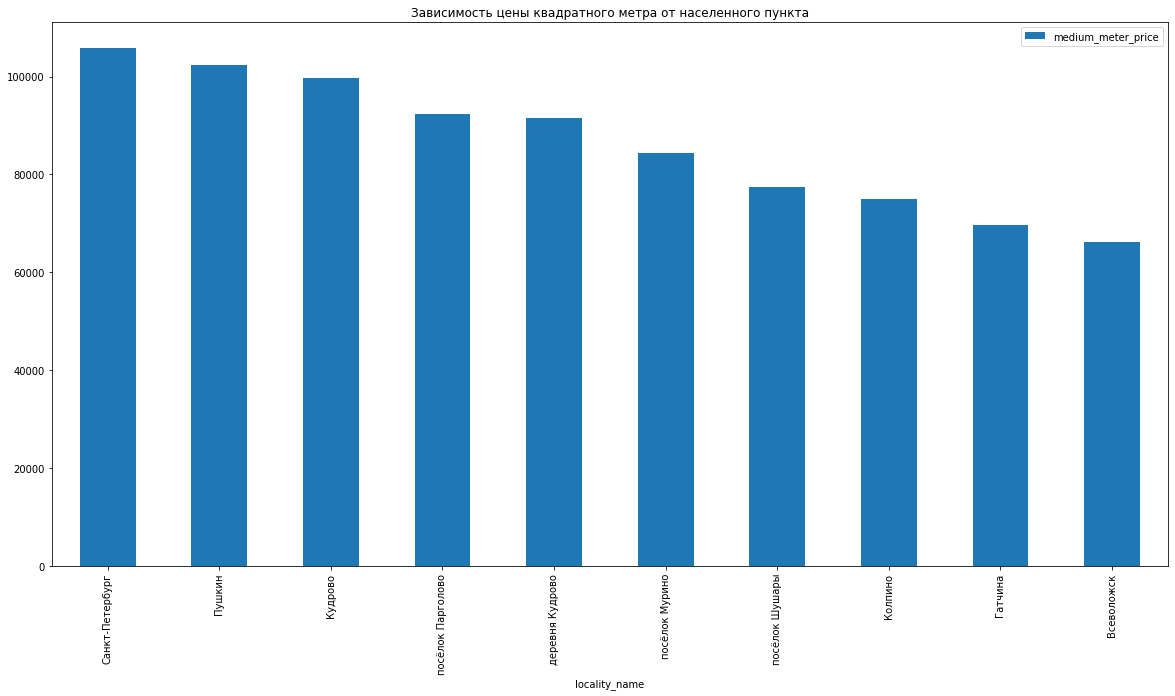

In [59]:
sorted_by_medium_meter_price = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count','median'])
sorted_by_medium_meter_price.columns = ['ads', 'medium_meter_price']
sorted_by_medium_meter_price = (
    sorted_by_medium_meter_price.query('ads >= 149')
    .sort_values(by='medium_meter_price', ascending=False)
    .round()
    .reset_index()
)
display (sorted_by_medium_meter_price)
sorted_by_medium_meter_price.plot(
    x='locality_name', y='medium_meter_price',
    kind='bar', figsize=(20, 10),
    title='Зависимость цены квадратного метра от населенного пункта')
plt.show()

Среди городов в наибольшим количеством объявлений, самая большая цена за квадратный метр в Санкт-Петербурге - 105 806, самая низкая во Всеволжске - 66 173


## Средняя цена кв.метра в СПб в зависимости от удаленности от центра

Выделим объекты в Санкт-Петербурге и вычислим среднюю цену каждого километра:

,citycenters_nearest_km,meter_price
0,0.000,164074.000
27,27.000,132116.000
6,6.000,131996.000
1,1.000,126761.000
5,5.000,126398.000
7,7.000,126064.000
8,8.000,125712.000
2,2.000,121135.000
4,4.000,115706.000
10,10.000,110460.000


Корреляция -0.7605812514131842


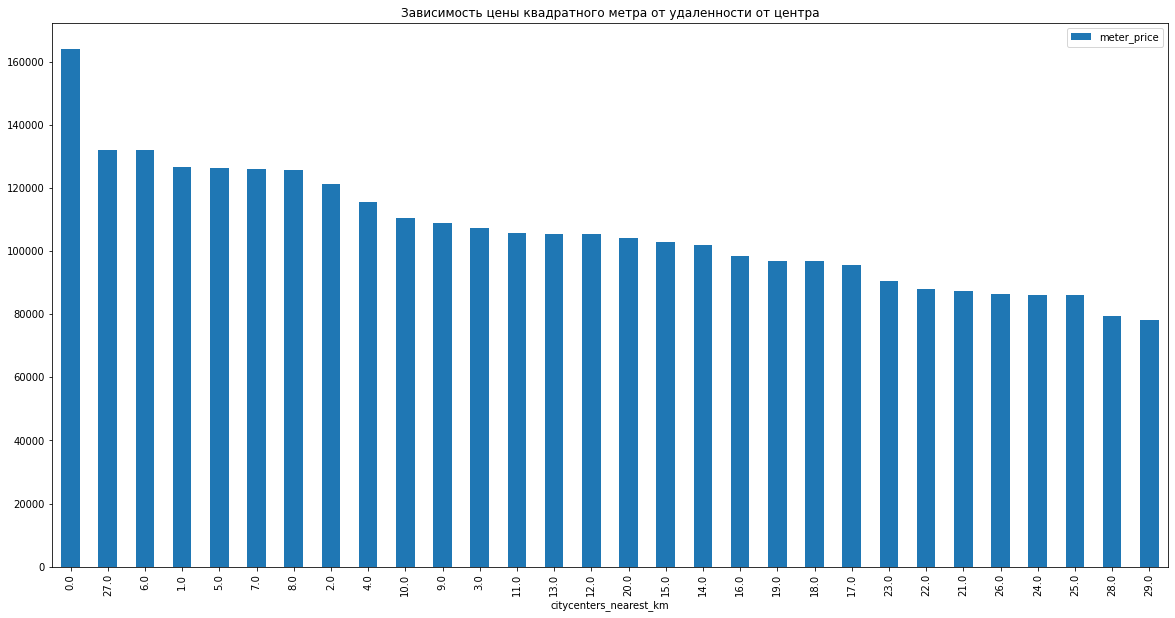

In [60]:
SPB_data = data.query('locality_name=="Санкт-Петербург"')
spb_meter_price = (
    SPB_data.pivot_table(index='citycenters_nearest_km', values='meter_price', aggfunc='median')
    .reset_index()
    .round()
    .sort_values(by='meter_price', ascending=False)
)
display (spb_meter_price)
print('Корреляция', spb_meter_price['citycenters_nearest_km'].corr(spb_meter_price['meter_price']))
spb_meter_price.plot(
    x='citycenters_nearest_km', y='meter_price',
    kind='bar', figsize=(20, 10),
    title='Зависимость цены квадратного метра от удаленности от центра')
plt.show()

И по корреляции и по и графику, мы видим, что цена за квардратный метр преимущественно уменьшается по мере удаления от центра.

# Вывод 

**В этом исследовании рынка недвижимости Санкт-Петербурга и близлежащих населенных пункта мы прошли через несколько основных этапов, на каждом из которых можно сделать определенные выводы. 
Подведем их после каждого этапа:**

*Первый этап*

***Ознакомление и предобработка***
   - замена пропусков
   - исправление ошибок в значениях
   - исключение выбивающихся значений
   - корректировка неявных дубликатов в названиях населенных пунктов
   - корректировка типов данных
   - добавление информации о цене за квадратный метр и разбивка информации о дате выставления объявления

 
*Второй этап*

***Анализ данных. Здесь мы нашли следущие интересные закономерности***

По площади:

   - площадь большей части объектов - до 75 кв.метров
   - жилая площадь чаще всего составляет от 15 до 30 кв.метров
   - кухни свыше 20 кв.метров встречаются редко
   - объявлений с двушками и однушками - больше всего
   - квартир с 4 и более комнатами почти не встречается
   - стандартная высота полотков - 2,7 метра
   - с 2014 по 2018 наблюдалось уменьшение метража продаваемых объектов
   
По цене:

   - обычно цена объекта варьируется от 3 до 5 млн. Самая "модная" цена - 3,75
   - первые этажи дешевле остальных
   - самый дорогой кв.метр в Санкт-Петербурге: в среднем 105 806
   - чем ближе к центру, тем, предсказуемо дороже квадратный метр
   - на 27 км от центра резкое удорожание квадратного метра (вероятно, дорогой ЖК)
   
По расположению:

   - чаще всего квартира расположена с 1 по 5 этаж
   - в исследуемой местности много домов с пятью и девятью этажами 
   - самые густозаселенные районы находятся на расстонии примерно 6 км, 5 км, 8 км и 12 км от центра
   - в исследуемой местноси много парков, в среднем, от парка до объекта недвижимости меньше километра
   
По работе сервиса:

   - самые популярные дни для сервиса - среда и вторник, а месяцы - май и июнь
   - в среднем продажа объекта занимает до 95 дней, но так же объявления часто находятся на сайте 45 и 60 дней
   - топ три населенных пунктов по числу объявлений:
      - Санкт-Петербург
      - посёлок Мурино
      - посёлок Шушары 	

***Касательно работы сервиса можно улучшить:***

**1. Сделать "список" населенных пунктов и адресов, из которых пользователь сможет выбрать свой.**
Это не только поможет избежать путаницы другим гостям сервиса, но и улучшит точность определения парков, аэропортов и другой инфраструктуры поблизости.
 
**2. Сделать все параметры метража с заполнением через "скроллеры".** Так ошибиться с лишним нулем будет намного сложнее.

**3. Добавить в возможность выбрать тип цены: за весь объект/за кв.метр.** Сравнить стоимость именно по второму параметру бывает просто необходимо.